In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import seawater
import netCDF4 as nc
import skill_metrics as sm #https://github.com/PeterRochford/SkillMetrics/tree/master/skill_metrics
#from mpl_toolkits.basemap import Basemap
import pickle
from cmocean import cm
from salishsea_tools import visualisations as vis
import arrow
import glob
from scipy.io import loadmat
import xarray as xr
%matplotlib inline


In [2]:
grid = xr.open_dataset('/data/bmoorema/MEOPAR/grid/bathymetry_201702.nc', mask_and_scale=False)
mask = xr.open_dataset('/data/bmoorema/MEOPAR/grid/mesh_mask201702.nc')

nav_lon = (grid['nav_lon'][:])
nav_lat = (grid['nav_lat'][:])
jdf_x = 85; jdf_y = 325; jdf_col = 'teal'
jdf2_x = 50; jdf2_y = 370; jdf2_col = 'mediumaquamarine'
jdf3_x = 130; jdf3_y = 290; jdf3_col = 'lightseagreen'

cs_x = 250; cs_y = 500; cs_col = 'royalblue'
cs2_x = 280; cs2_y = 440; cs2_col = 'navy'
cs3_x = 220; cs3_y = 540; cs3_col = 'dodgerblue'

haro_x = 230; haro_y = 310; haro_col = 'tomato'
haro2_x = 340; haro2_y = 290; haro2_col = 'firebrick'
haro3_x = 260; haro3_y = 335; haro3_col = 'indianred'


ns_x = 160; ns_y = 680; ns_col = 'olive'
ns2_x = 150; ns2_y = 640; ns2_col = 'yellowgreen'
ns3_x = 155; ns3_y = 710; ns3_col = 'palegoldenrod'


xs_list = [jdf_x, jdf2_x, jdf3_x,cs_x, cs2_x, cs3_x,haro_x, haro2_x, haro3_x,ns_x, ns2_x, ns3_x]
ys_list = [jdf_y, jdf2_y, jdf3_y,cs_y, cs2_y, cs3_y,haro_y, haro2_y, haro3_y,ns_y, ns2_y, ns3_y]
cols_list = ['teal', 'mediumaquamarine',  'lightseagreen',  'royalblue', 'navy',\
 'dodgerblue', 'tomato','firebrick','indianred',  'olive', 'yellowgreen', 'palegoldenrod']


In [4]:
# BUDGET_var_jdf

In [5]:
#extract means for BR1-BUDGET, get fraser discharge
#var
# BR1_var = pickle.load(open('./pkls/BR1_DIC_means_inletsIN.pkl' , 'rb')) 
# BR2_var = pickle.load(open('./pkls/BR2_DIC_means_inletsIN.pkl' , 'rb')) 
BUDGET_var = pickle.load(open('./pkls/BUDGET_DIC_means_inletsIN.pkl' , 'rb')) 
BUDGET_var[BUDGET_var == 0] = np.nan
# PI1_var = pickle.load(open('./pkls/PI1_DIC_means_inletsIN.pkl' , 'rb')) 
# PI2_var = pickle.load(open('./pkls/PI2_DIC_means_inletsIN.pkl' , 'rb')) 
# PI3rr_var = pickle.load(open('./pkls/PI3rr_DIC_means_inletsIN.pkl' , 'rb')) 
# PI4_var = pickle.load(open('./pkls/PI4_DIC_means_inletsIN.pkl' , 'rb')) 
# PI4_var[PI4_var == 0] = np.nan
CAR50_4_var = pickle.load(open('./pkls/CAR50_4_DIC_means_inletsIN.pkl' , 'rb')) 
CAR50_4_var[CAR50_4_var == 0] = np.nan
# Fraser_discharge = pickle.load(open('./pkls/Fraser_2015_year_runoff_m3_s.pkl', 'rb'))  



mesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
bath = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
depth = mesh['gdept_1d'][:]
days_in = np.arange(1,366,1)
#make a long 3-year dataset to be able to compare spinup progress for BR run



BUDGET_var_jdf = pickle.load(open('./pkls/BUDGET_DIC_means_JDF.pkl','rb'))
CAR50_4_var_jdf = pickle.load(open('./pkls/CAR50_4_DIC_means_JDF.pkl','rb'))
BUDGET_var_cs = pickle.load(open('./pkls/BUDGET_DIC_means_CSOG.pkl','rb'))
CAR50_4_var_cs = pickle.load(open('./pkls/CAR50_4_DIC_means_CSOG.pkl','rb'))
BUDGET_var_ns = pickle.load(open('./pkls/BUDGET_DIC_means_ns_BOX.pkl','rb'))
CAR50_4_var_ns = pickle.load(open('./pkls/CAR50_4_DIC_means_ns_BOX.pkl','rb'))


BUDGET_dp = np.nanmean(BUDGET_var, axis =1)
CAR50_4_dp = np.nanmean(CAR50_4_var, axis =1)

BUDGET_jdf_dp = np.nanmean(BUDGET_var_jdf, axis =1)
CAR50_4_jdf_dp = np.nanmean(CAR50_4_var_jdf, axis =1)
BUDGET_cs_dp = np.nanmean(BUDGET_var_cs, axis =1)
CAR50_4_cs_dp = np.nanmean(CAR50_4_var_cs, axis =1)
BUDGET_ns_dp = np.nanmean(BUDGET_var_ns, axis =1)
CAR50_4_ns_dp = np.nanmean(CAR50_4_var_ns, axis =1)
# BUDGET_haro_dp = np.nanmean(BUDGET_var_haro, axis =1)
# CAR50_4_haro_dp = np.nanmean(CAR50_4_var_haro, axis =1)

# BUDGET_jdf2_dp = np.nanmean(BUDGET_var_jdf2, axis =1)
# CAR50_4_jdf2_dp = np.nanmean(CAR50_4_var_jdf2, axis =1)
# BUDGET_cs2_dp = np.nanmean(BUDGET_var_cs2, axis =1)
# CAR50_4_cs2_dp = np.nanmean(CAR50_4_var_cs2, axis =1)
# BUDGET_ns2_dp = np.nanmean(BUDGET_var_ns2, axis =1)
# CAR50_4_ns2_dp = np.nanmean(CAR50_4_var_ns2, axis =1)
# BUDGET_haro2_dp = np.nanmean(BUDGET_var_haro2, axis =1)
# CAR50_4_haro2_dp = np.nanmean(CAR50_4_var_haro2, axis =1)

# BUDGET_jdf3_dp = np.nanmean(BUDGET_var_jdf3, axis =1)
# CAR50_4_jdf3_dp = np.nanmean(CAR50_4_var_jdf3, axis =1)
# BUDGET_cs3_dp = np.nanmean(BUDGET_var_cs3, axis =1)
# CAR50_4_cs3_dp = np.nanmean(CAR50_4_var_cs3, axis =1)
# BUDGET_ns3_dp = np.nanmean(BUDGET_var_ns3, axis =1)
# CAR50_4_ns3_dp = np.nanmean(CAR50_4_var_ns3, axis =1)
# BUDGET_haro3_dp = np.nanmean(BUDGET_var_haro3, axis =1)
# CAR50_4_haro3_dp = np.nanmean(CAR50_4_var_haro3, axis =1)

depths = mesh['gdept_1d'][:]
zdepth = depths[0]   

jdf_x = 85; jdf_y = 325; jdf_col = 'teal'
jdf2_x = 50; jdf2_y = 370; jdf2_col = 'mediumaquamarine'
jdf3_x = 130; jdf3_y = 290; jdf3_col = 'lightseagreen'

cs_x = 250; cs_y = 500; cs_col = 'royalblue'
cs2_x = 280; cs2_y = 440; cs2_col = 'navy'
cs3_x = 220; cs3_y = 540; cs3_col = 'dodgerblue'

haro_x = 230; haro_y = 310; haro_col = 'tomato'
haro2_x = 340; haro2_y = 290; haro2_col = 'firebrick'
haro3_x = 260; haro3_y = 335; haro3_col = 'indianred'


ns_x = 160; ns_y = 680; ns_col = 'olive'
ns2_x = 150; ns2_y = 640; ns2_col = 'yellowgreen'
ns3_x = 155; ns3_y = 710; ns3_col = 'palegoldenrod'


/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: Mean of empty slice
/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: Mean of empty slice
/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: Mean of empty slice
/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: Mean of empty slice
/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: Mean of empty slice
/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: Mean of empty slice
/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: Mean of empty slice


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


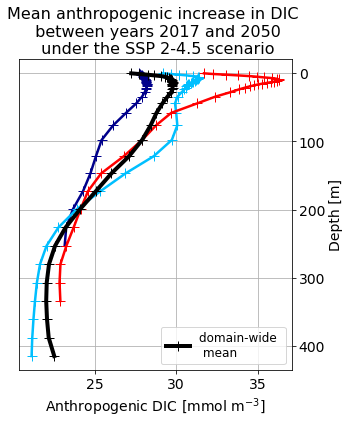

In [6]:
tmesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
fact = 1/72; fs = 14
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)

#plt.rcParams["font.family"] = "cursive"
plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
fact = 0.6
fig, ax3 = plt.subplots(1,1, figsize=(8*fact, 10*fact), facecolor='w', edgecolor='k')

td = 33
ax3.plot(CAR50_4_jdf_dp[0:td]-BUDGET_jdf_dp[0:td],zdepth[0:td], marker = '+', \
         linestyle = '-', linewidth = 2.5, color = 'darkblue', markersize = 10)# label = 'JdF mean')
# ax3.plot(CAR50_4_jdf2_dp-BUDGET_jdf2_dp,zdepth, marker = '+', \
#          linestyle = '-', linewidth = 2.5, color = jdf2_col, markersize = 10)# label = 'JdF mean')
# ax3.plot(CAR50_4_jdf3_dp-BUDGET_jdf3_dp,zdepth, marker = '+', \
#          linestyle = '-', linewidth = 2.5, color = jdf3_col, markersize = 10)# label = 'JdF mean')

ax3.plot(CAR50_4_cs_dp-BUDGET_cs_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = 'deepskyblue', markersize = 10)# label = 'cs mean')
# ax3.plot(CAR50_4_cs2_dp-BUDGET_cs2_dp,zdepth, marker = '+', \
#          linestyle = '-', linewidth = 2.5, color = cs2_col, markersize = 10)# label = 'cs mean')
# ax3.plot(CAR50_4_cs3_dp-BUDGET_cs3_dp,zdepth, marker = '+', \
#          linestyle = '-', linewidth = 2.5, color = cs3_col, markersize = 10)# label = 'cs mean')

ax3.plot(CAR50_4_ns_dp-BUDGET_ns_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = 'red', markersize = 10)# label = 'ns mean')
# ax3.plot(CAR50_4_ns2_dp-BUDGET_ns2_dp,zdepth, marker = '+', \
#          linestyle = '-', linewidth = 2.5, color = ns2_col, markersize = 10)# label = 'ns mean')
# ax3.plot(CAR50_4_ns3_dp-BUDGET_ns3_dp,zdepth, marker = '+', \
#          linestyle = '-', linewidth = 2.5, color = ns3_col, markersize = 10)# label = 'ns mean')

# ax3.plot(CAR50_4_haro_dp-BUDGET_haro_dp,zdepth, marker = '+', \
#          linestyle = '-', linewidth = 2.5, color = haro_col, markersize = 10)# label = 'haro mean')
# ax3.plot(CAR50_4_haro2_dp-BUDGET_haro2_dp,zdepth, marker = '+', \
#          linestyle = '-', linewidth = 2.5, color = haro2_col, markersize = 10)# label = 'haro mean')
# ax3.plot(CAR50_4_haro3_dp-BUDGET_haro3_dp,zdepth, marker = '+', \
#          linestyle = '-', linewidth = 2.5, color = haro3_col, markersize = 10)# label = 'haro mean')

ax3.plot(CAR50_4_dp-BUDGET_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 4, color = 'k',\
         markersize = 10, label = 'domain-wide \n mean')

ax3.set_title('Mean anthropogenic increase in DIC \n between years 2017 and 2050\n under the SSP 2-4.5 scenario', fontsize = fs+2)
ax3.invert_yaxis() 
ax3.yaxis.set_label_position("right")
ax3.yaxis.tick_right()
ax3.legend(loc = 'lower right', fontsize = fs-2)
ax3.set_xlabel('Anthropogenic DIC [mmol m$^{-3}$]', fontsize = fs)
ax3.set_ylabel('Depth [m]', fontsize = fs)
ax3.grid()
plt.tight_layout()

# fig.savefig('./CG_FIGS/FIG_CG_03_mean_and_extra.jpg')
# 

In [7]:
st = 0
diffs =  CAR50_4_var[:,st:365] - BUDGET_var[:,st:365]
print(np.shape(diffs))
tw = np.nanmean(diffs, axis = 1)
print(np.shape(tw))
tw[39] = 0 
csd = '/ocean/tjarniko/MEOPAR/analysis_tereza/notebooks/PI_CARBON_PAPER/MAIN_ANALYSIS/pkls/cellsize_alg2.pkl'

csd = pickle.load(open(csd , 'rb')) 

csdfin = np.nansum(np.nansum(csd, axis = 1), axis = 1)
print((csdfin))

csd_broad = np.zeros([40,365])
for i in range(0,365):
    csd_broad[:,i] = csdfin
    
    
# print(np.shape(diffs))
# print(np.shape(csd))
print(np.average(tw, weights = csdfin))

(40, 365)
(40,)


/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.


[17730278930.479958 17730347370.631905 17730480673.787052
 17730740312.658318 16997176505.246202 16874149793.795547
 16751694446.911232 16646568410.42559 16514973695.297358
 16403750635.309036 16299940186.29875 16228020753.989017
 16195225772.443077 16237200199.78711 16464450409.119404
 17012657738.396297 18177117073.82859 20503377738.055313 24977582540.8144
 33341632036.200733 48181544643.08853 72610495319.3313 108627543518.70749
 151733782510.2329 189792852280.57523 210500557862.93567 209938091530.9837
 193571647210.41797 167336722040.633 134523217320.31241 101843988049.88788
 79680113283.59392 63215628838.41362 52615581231.11301 42936590524.341255
 32588706897.182045 23263168310.79526 16979418854.450266 10431313390.36983
 0.0]
27.203565229481516


In [8]:
grid_B = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')
mesh_mask = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/mesh_mask201702.nc')
# bathy, lons, lats = tidetools.get_bathy_data(grid_B)
# print(mesh_mask)
lons = grid_B['nav_lon'][:]
lats = grid_B['nav_lat'][:]
bathy2 = grid_B['Bathymetry'][:]
tmask = mesh_mask.variables['tmask'][:]

gdept = mesh_mask.variables['gdept_0'][0,:,:,:]
gdepw = mesh_mask.variables['gdepw_0'][0,:,:,:]

e3t = mesh_mask.variables['e3t_0'][0,:,:,:]
e3w = mesh_mask.variables['e3w_0'][0,:,:,:]

def haversine(lon1, lat1, lon2, lat2):
    """Calculate the great-circle distance in kilometers between two points
    on a sphere from their longitudes and latitudes.
    Reference: http://www.movable-type.co.uk/scripts/latlong.html
    :arg lon1: Longitude of point 1.
    :type lon1: float or :py:class:`numpy.ndarray`
    :arg lat1: Latitude of point 1.
    :type lat1: float or :py:class:`numpy.ndarray`
    :arg lon2: Longitude of point 2.
    :type lon2: float or :py:class:`numpy.ndarray`
    :arg lat2: Latitude of point 2.
    :type lat2: float or :py:class:`numpy.ndarray`
    :returns: Great-circle distance between two points in km
    :rtype: float or :py:class:`numpy.ndarray`
    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

def distance_along_curve(lons, lats):
    """Calculate cumulative distance between points in lons, lats
    :arg lons: longitude points
    :type lons: numpy array
    :arg lats: latitude points
    :type lats: numpy array
    :returns: dist, a numpy array with distance along track
    """
    dist = [0]
    for i in np.arange(1, lons.shape[0]):
        newdist = dist[i-1] + haversine(lons[i], lats[i],
                                                  lons[i-1], lats[i-1])
        dist.append(newdist)
    dist = np.array(dist)
    return dist


def load_thalweg(
    gdept, lons, lats,
    filename='/data/nsoontie/MEOPAR/tools/bathymetry/thalweg_working.txt'
):
    """Thalweg grid indices, depths and disatance.
    :arg gdept: full model depth array (shape 40x898x398)
    :type gdept: numpy array
    :arg lons: model longitude array (shape 898x398)
    :type lons: numpy array
    :arg lats: model latitude array (shape 898x398)
    :type lats: numpy array
    :returns: tpoints, gdept_thal, xx_thal
    An array of thalweg grid indices, depths and distance.
    """
    tpoints = np.loadtxt(filename, delimiter=' ', dtype=int)
    gdept_thal = gdept[:, tpoints[:, 0], tpoints[:, 1]]
    lons_thal = lons[tpoints[:, 0], tpoints[:, 1]]
    lats_thal = lats[tpoints[:, 0], tpoints[:, 1]]
    xx_thal = distance_along_curve(lons_thal, lats_thal)
    xx_thal = xx_thal + np.zeros(gdept_thal.shape)
    return tpoints, gdept_thal, xx_thal


thalweg_points, gdept_thal, xx = load_thalweg(gdept, lons, lats)

In [9]:
jdf_x = 85; jdf_y = 325; jdf_col = 'teal'
jdf2_x = 50; jdf2_y = 370; jdf2_col = 'mediumaquamarine'  ###
jdf3_x = 130; jdf3_y = 290; jdf3_col = 'lightseagreen'

cs_x = 250; cs_y = 500; cs_col = 'royalblue'
cs2_x = 280; cs2_y = 440; cs2_col = 'navy'
cs3_x = 220; cs3_y = 540; cs3_col = 'dodgerblue'

haro_x = 230; haro_y = 310; haro_col = 'tomato'
haro2_x = 340; haro2_y = 290; haro2_col = 'firebrick'
haro3_x = 260; haro3_y = 335; haro3_col = 'indianred'


ns_x = 160; ns_y = 680; ns_col = 'olive'
ns2_x = 150; ns2_y = 640; ns2_col = 'yellowgreen'
ns3_x = 155; ns3_y = 710; ns3_col = 'palegoldenrod'


# print(thalweg_points[70:110,:])
# print(thalweg_points[77,:])

t_x = jdf_x; t_y = jdf_y

xs = thalweg_points[:,1]
ys = thalweg_points[:,0]

st_xs = np.array([jdf_x, jdf2_x, jdf3_x, haro_x, haro2_x, haro3_x, ns_x, ns2_x, ns3_x, cs_x, cs2_x, cs3_x])
st_ys = np.array([jdf_y, jdf2_y, jdf3_y, haro_y, haro2_y, haro3_y, ns_y, ns2_y, ns3_y, cs_y, cs2_y, cs3_y])
cols = [jdf_col, jdf2_col, jdf3_col, haro_col, haro2_col, haro3_col, ns_col, ns2_col, ns3_col, cs_col, cs2_col, cs3_col]
tpoints = np.zeros_like(st_xs)

for i in range(0,len(st_xs)):
    t_x = st_xs[i]
    t_y = st_ys[i]
    squared_dist = (xs-t_x)**2 + (ys-t_y)**2
#    print(np.nanmin(squared_dist))
    w = np.where(squared_dist == np.nanmin(squared_dist))
#     print(thalweg_points[w,:])
#     print(f'{t_x},{t_y}')
    tdist = xx[0,w]
    print(tdist[0,0])
    print(type(tdist))
    print(np.shape(tdist))
    print(np.shape(tdist[0,0]))
    tpoints[i] = tdist[0,0]

print(tpoints)
#print(xx[:,1])

78.50180302286462
<class 'numpy.ndarray'>
(1, 1)
()
38.62736688753894
<class 'numpy.ndarray'>
(1, 1)
()
117.33268114914623
<class 'numpy.ndarray'>
(1, 1)
()
231.464727622876
<class 'numpy.ndarray'>
(1, 1)
()
282.9736157088144
<class 'numpy.ndarray'>
(1, 1)
()
261.5752915846608
<class 'numpy.ndarray'>
(1, 1)
()
549.9475471741787
<class 'numpy.ndarray'>
(1, 1)
()
528.983492775422
<class 'numpy.ndarray'>
(1, 1)
()
571.1826148346049
<class 'numpy.ndarray'>
(1, 1)
()
396.9102568491354
<class 'numpy.ndarray'>
(1, 1)
()
357.87804641933525
<class 'numpy.ndarray'>
(1, 1)
()
432.8308059498386
<class 'numpy.ndarray'>
(1, 1)
()
[ 78  38 117 231 282 261 549 528 571 396 357 432]


NameError: name 'BR3_DIC_summer' is not defined

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


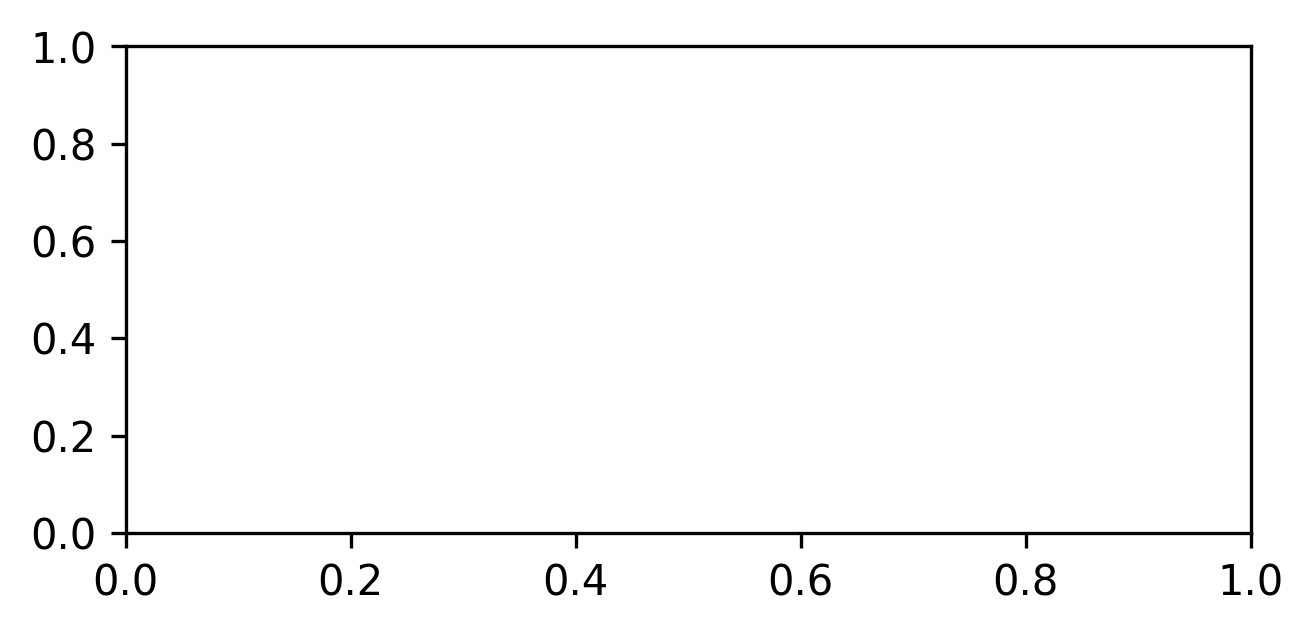

In [10]:
tmesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
fact = 1/72; fs = 10
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)

#plt.rcParams["font.family"] = "cursive"
plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

fig = plt.figure(figsize=(19/2.54, 12/2.54),dpi = 300)

ax3 = plt.subplot2grid((2,3), (0,0), colspan=2, rowspan=1)
cbar = \
vis.contour_thalweg(ax3, BR3_DIC_summer, bathy, meshmask,\
                    np.arange(1900, 2200, 20), cmap = cm.matter)

for i in range(0,len(st_xs)):
    ax3.scatter(tpoints[i],410, color = cols[i], edgecolors = 'k', zorder = 10)
ax3.set_title(r'$\bf{a)}$ Summer Average DIC (present-day)',fontsize = fs)
ax3.set_xlabel('Distance along thalweg [km]',fontsize = fs)
ax3.set_ylabel('Depth [m]',fontsize = 8)
cbar.ax.tick_params(labelsize=8) 
cbar.set_label('DIC [mmol m$^{-3}$]', fontsize = fs)
ax3.tick_params(axis='both', which='major', labelsize=fs)
#ax3.text(0.03, 0.03, 'd)', transform=ax3.transAxes, fontsize=8, fontweight='bold', va='bottom')
ax3.tick_params(axis='both', which='major', labelsize=fs)
ax3.text(0.15, 0.11, 'Ocean \n Exchange', transform=ax3.transAxes, \
         fontsize=8, fontweight='bold', ha ='center', va='bottom')
ax3.text(0.875, 0.11, 'Northern \n Fjord', transform=ax3.transAxes, \
         fontsize=8, fontweight='bold', ha ='center', va='bottom')
ax3.set_ylim([0,440])
ax3.invert_yaxis()

#
ax3 = plt.subplot2grid((2,3), (1,0), colspan=2, rowspan=1)
cbar = \
vis.contour_thalweg(ax3, BR3_DIC_winter, bathy, meshmask,\
                    np.arange(1900, 2200, 20), cmap = cm.matter)
for i in range(0,len(st_xs)):
    ax3.scatter(tpoints[i],415, color = cols[i], edgecolors = 'k', zorder = 10)
ax3.set_title(r'$\bf{b)}$ Winter Average DIC (present-day)',fontsize = fs)
ax3.set_xlabel('Distance along thalweg [km]',fontsize = fs)
ax3.set_ylabel('Depth [m]',fontsize = fs)
cbar.ax.tick_params(labelsize=8) 
cbar.set_label('DIC [mmol m$^{-3}$]', fontsize = fs)
ax3.tick_params(axis='both', which='major', labelsize=fs)
#ax3.text(0.03, 0.03, 'd)', transform=ax3.transAxes, fontsize=8, fontweight='bold', va='bottom')
ax3.tick_params(axis='both', which='major', labelsize=fs)
ax3.text(0.15, 0.11, 'Ocean \n Exchange', transform=ax3.transAxes, \
         fontsize=8, fontweight='bold', ha ='center', va='bottom')
ax3.text(0.875, 0.11, 'Northern \n Fjord', transform=ax3.transAxes, \
         fontsize=8, fontweight='bold', ha ='center', va='bottom')
ax3.set_ylim([0,440])
ax3.invert_yaxis()



# depth profile
ax3 = plt.subplot2grid((2,3), (0,2), colspan=1, rowspan=2) 

ax3.plot(BR3_jdf_dp-PI9_jdf_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = jdf_col, markersize = 10)# label = 'JdF mean')
ax3.plot(BR3_jdf2_dp-PI9_jdf2_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = jdf2_col, markersize = 10)# label = 'JdF mean')
ax3.plot(BR3_jdf3_dp-PI9_jdf3_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = jdf3_col, markersize = 10)# label = 'JdF mean')

ax3.plot(BR3_cs_dp-PI9_cs_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = cs_col, markersize = 10)# label = 'cs mean')
ax3.plot(BR3_cs2_dp-PI9_cs2_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = cs2_col, markersize = 10)# label = 'cs mean')
ax3.plot(BR3_cs3_dp-PI9_cs3_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = cs3_col, markersize = 10)# label = 'cs mean')

ax3.plot(BR3_ns_dp-PI9_ns_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = ns_col, markersize = 10)# label = 'ns mean')
ax3.plot(BR3_ns2_dp-PI9_ns2_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = ns2_col, markersize = 10)# label = 'ns mean')
ax3.plot(BR3_ns3_dp-PI9_ns3_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = ns3_col, markersize = 10)# label = 'ns mean')

ax3.plot(BR3_haro_dp-PI9_haro_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = haro_col, markersize = 10)# label = 'haro mean')
ax3.plot(BR3_haro2_dp-PI9_haro2_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = haro2_col, markersize = 10)# label = 'haro mean')
ax3.plot(BR3_haro3_dp-PI9_haro3_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = haro3_col, markersize = 10)# label = 'haro mean')

ax3.plot(BR3_dp-PI9_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 4, color = 'k',\
         markersize = 10, label = 'domain-wide \n mean')

ax3.set_title(r'$\bf{c)}$ Mean anthropogenic increase in DIC', fontsize = fs)
ax3.invert_yaxis()
ax3.yaxis.set_label_position("right")
ax3.yaxis.tick_right()
ax3.legend(loc = 'lower left', fontsize = fs-2)
ax3.set_xlabel('Anthropogenic DIC [mmol m$^{-3}$]', fontsize = fs)
ax3.set_ylabel('Depth [m]', fontsize = fs)
ax3.grid()
plt.tight_layout()

fig.savefig('./CG_FIGS/FIG_CG_03_mean_and_extra.jpg')
# 

In [ ]:
print('jdf')
print(f'{np.nanmax(BR3_jdf_dp-PI9_jdf_dp)},{np.nanmin(BR3_jdf_dp-PI9_jdf_dp)}')
print(f'{np.nanmax(BR3_jdf2_dp-PI9_jdf2_dp)},{np.nanmin(BR3_jdf2_dp-PI9_jdf2_dp)}')
print(f'{np.nanmax(BR3_jdf3_dp-PI9_jdf3_dp)},{np.nanmin(BR3_jdf3_dp-PI9_jdf3_dp)}')

##
print('haro')
print(f'{np.nanmax(BR3_haro_dp-PI9_haro_dp)},{np.nanmin(BR3_haro_dp-PI9_haro_dp)}')
print(f'{np.nanmax(BR3_haro2_dp-PI9_haro2_dp)},{np.nanmin(BR3_haro2_dp-PI9_haro2_dp)}')
print(f'{np.nanmax(BR3_haro3_dp-PI9_haro3_dp)},{np.nanmin(BR3_haro3_dp-PI9_haro3_dp)}')
print('cs')
print(f'{np.nanmax(BR3_cs_dp-PI9_cs_dp)},{np.nanmin(BR3_cs_dp-PI9_cs_dp)}')
print(f'{np.nanmax(BR3_cs2_dp-PI9_cs2_dp)},{np.nanmin(BR3_cs2_dp-PI9_cs2_dp)}')
print(f'{np.nanmax(BR3_cs3_dp-PI9_cs3_dp)},{np.nanmin(BR3_cs3_dp-PI9_cs3_dp)}')
print('ns')
print(f'{np.nanmax(BR3_ns_dp-PI9_ns_dp)},{np.nanmin(BR3_ns_dp-PI9_ns_dp)}')
print(f'{np.nanmax(BR3_ns2_dp-PI9_ns2_dp)},{np.nanmin(BR3_ns2_dp-PI9_ns2_dp)}')
print(f'{np.nanmax(BR3_ns3_dp-PI9_ns3_dp)},{np.nanmin(BR3_ns3_dp-PI9_ns3_dp)}')



# ax3.plot(BR3_jdf_dp-PI9_jdf_dp,zdepth, marker = '+', \
#          linestyle = '-', linewidth = 2.5, color = jdf_col, markersize = 10)# label = 'JdF mean')
# ax3.plot(BR3_jdf2_dp-PI9_jdf2_dp,zdepth, marker = '+', \
#          linestyle = '-', linewidth = 2.5, color = jdf2_col, markersize = 10)# label = 'JdF mean')
# ax3.plot(BR3_jdf3_dp-PI9_jdf3_dp,zdepth, marker = '+', \
#          linestyle = '-', linewidth = 2.5, color = jdf3_col, markersize = 10)# label = 'JdF mean')

# ax3.plot(BR3_cs_dp-PI9_cs_dp,zdepth, marker = '+', \
#          linestyle = '-', linewidth = 2.5, color = cs_col, markersize = 10)# label = 'cs mean')
# ax3.plot(BR3_cs2_dp-PI9_cs2_dp,zdepth, marker = '+', \
#          linestyle = '-', linewidth = 2.5, color = cs2_col, markersize = 10)# label = 'cs mean')
# ax3.plot(BR3_cs3_dp-PI9_cs3_dp,zdepth, marker = '+', \
#          linestyle = '-', linewidth = 2.5, color = cs3_col, markersize = 10)# label = 'cs mean')

# ax3.plot(BR3_ns_dp-PI9_ns_dp,zdepth, marker = '+', \
#          linestyle = '-', linewidth = 2.5, color = ns_col, markersize = 10)# label = 'ns mean')
# ax3.plot(BR3_ns2_dp-PI9_ns2_dp,zdepth, marker = '+', \
#          linestyle = '-', linewidth = 2.5, color = ns2_col, markersize = 10)# label = 'ns mean')
# ax3.plot(BR3_ns3_dp-PI9_ns3_dp,zdepth, marker = '+', \
#          linestyle = '-', linewidth = 2.5, color = ns3_col, markersize = 10)# label = 'ns mean')

# ax3.plot(BR3_haro_dp-PI9_haro_dp,zdepth, marker = '+', \
#          linestyle = '-', linewidth = 2.5, color = haro_col, markersize = 10)# label = 'haro mean')
# ax3.plot(BR3_haro2_dp-PI9_haro2_dp,zdepth, marker = '+', \
#          linestyle = '-', linewidth = 2.5, color = haro2_col, markersize = 10)# label = 'haro mean')
# ax3.plot(BR3_haro3_dp-PI9_haro3_dp,zdepth, marker = '+', \
#          linestyle = '-', linewidth = 2.5, color = haro3_col, markersize = 10)# label = 'haro mean')

# ax3.plot(BR3_dp-PI9_dp,zdepth, marker = '+', \
#          linestyle = '-', linewidth = 4, color = 'k',\
#          markersize = 10, label = 'domain-wide \n mean')


## calculate full year mean for DIC and TA, 

In [ ]:

# start ='2015-01-01'
# end ='2015-12-31'

# start_run = arrow.get(start)
# end_run = arrow.get(end)

# arrow_array1 = []

# for r in arrow.Arrow.span_range('day', start_run, end_run):
#     arrow_array1.append(r)
# dayslen = len(arrow_array1)

# BR_oma_summer1 = np.zeros([dayslen,40,898,398])

# for i in range(0,dayslen):

#     tdate = arrow_array1[i][0]
#     ymd = tdate.format('YYYYMMDD')

#     if i%10 == 0:
#         print(ymd)
#     tstr = glob.glob('//data/tjarniko/results/BASERUN_EXP/MAIN/BR_3rd_2015/ncs/SKOG*carp*'+ymd+'*.nc')
#     tnc = tstr[0]
#     tn = nc.Dataset(tnc)
#     t_dic = tn['dissolved_inorganic_carbon'][0,:,:,:]
#     BR_oma_summer1[i,:,:,:] = t_dic


# print(np.shape(BR_oma_summer1))
# BR_oma_summer_mean = np.nanmean(BR_oma_summer1,axis=0)
# pickle.dump(BR_oma_summer_mean, open("./pkls/BR3_DIC_fullyear_mean.pkl", 'wb'))

In [ ]:

# start ='2015-01-01'
# end ='2015-12-31'

# start_run = arrow.get(start)
# end_run = arrow.get(end)

# arrow_array1 = []

# for r in arrow.Arrow.span_range('day', start_run, end_run):
#     arrow_array1.append(r)
# dayslen = len(arrow_array1)

# BR_oma_summer1 = np.zeros([dayslen,40,898,398])

# for i in range(0,dayslen):

#     tdate = arrow_array1[i][0]
#     ymd = tdate.format('YYYYMMDD')

#     if i%10 == 0:
#         print(ymd)
#     tstr = glob.glob('//data/tjarniko/results/BASERUN_EXP/MAIN/BR_3rd_2015/ncs/SKOG*carp*'+ymd+'*.nc')
#     tnc = tstr[0]
#     tn = nc.Dataset(tnc)
#     t_dic = tn['total_alkalinity'][0,:,:,:]
#     BR_oma_summer1[i,:,:,:] = t_dic


# print(np.shape(BR_oma_summer1))
# BR_oma_summer_mean = np.nanmean(BR_oma_summer1,axis=0)
# pickle.dump(BR_oma_summer_mean, open("./pkls/BR3_TA_fullyear_mean.pkl", 'wb'))

In [ ]:

# start ='2015-01-01'
# end ='2015-12-31'

# start_run = arrow.get(start)
# end_run = arrow.get(end)

# arrow_array1 = []

# for r in arrow.Arrow.span_range('day', start_run, end_run):
#     arrow_array1.append(r)
# dayslen = len(arrow_array1)

# BR_oma_summer1 = np.zeros([dayslen,40,898,398])

# for i in range(0,dayslen):

#     tdate = arrow_array1[i][0]
#     ymd = tdate.format('YYYYMMDD')

#     if i%10 == 0:
#         print(ymd)
#     tstr = glob.glob('//data/tjarniko/results/BASERUN_EXP/PI9/ncs/SKOG*carp*'+ymd+'*.nc')
#     tnc = tstr[0]
#     tn = nc.Dataset(tnc)
#     t_dic = tn['dissolved_inorganic_carbon'][0,:,:,:]
#     BR_oma_summer1[i,:,:,:] = t_dic


# print(np.shape(BR_oma_summer1))
# BR_oma_summer_mean = np.nanmean(BR_oma_summer1,axis=0)
# pickle.dump(BR_oma_summer_mean, open("./pkls/PI9_DIC_fullyear_mean.pkl", 'wb'))

In [ ]:

# start ='2015-01-01'
# end ='2015-12-31'

# start_run = arrow.get(start)
# end_run = arrow.get(end)

# arrow_array1 = []

# for r in arrow.Arrow.span_range('day', start_run, end_run):
#     arrow_array1.append(r)
# dayslen = len(arrow_array1)

# BR_oma_summer1 = np.zeros([dayslen,40,898,398])

# for i in range(0,dayslen):

#     tdate = arrow_array1[i][0]
#     ymd = tdate.format('YYYYMMDD')

#     if i%10 == 0:
#         print(ymd)
#     tstr = glob.glob('//data/tjarniko/results/BASERUN_EXP/PI9/ncs/SKOG*carp*'+ymd+'*.nc')
#     tnc = tstr[0]
#     tn = nc.Dataset(tnc)
#     t_TA = tn['total_alkalinity'][0,:,:,:]
#     BR_oma_summer1[i,:,:,:] = t_TA


# print(np.shape(BR_oma_summer1))
# BR_oma_summer_mean = np.nanmean(BR_oma_summer1,axis=0)
# pickle.dump(BR_oma_summer_mean, open("./pkls/PI9_TA_fullyear_mean.pkl", 'wb'))

## make SF by-layer and fraser-phyto

In [ ]:
# #extract means for BR1-BR3, get fraser discharge
# #var
# BR1_var = pickle.load(open('../pkls/BR1_DIC_means_inletsIN.pkl' , 'rb')) 
# BR2_var = pickle.load(open('../pkls/BR2_DIC_means_inletsIN.pkl' , 'rb')) 
# BR3_var = pickle.load(open('../pkls/BR3_DIC_means_inletsIN.pkl' , 'rb')) 

# PI1_var = pickle.load(open('../pkls/PI1_DIC_means_inletsIN.pkl' , 'rb')) 
# PI2_var = pickle.load(open('../pkls/PI2_DIC_means_inletsIN.pkl' , 'rb')) 
# PI3rr_var = pickle.load(open('../pkls/PI3rr_DIC_means_inletsIN.pkl' , 'rb')) 
# PI4_var = pickle.load(open('../pkls/PI4_DIC_means_inletsIN.pkl' , 'rb')) 
# PI4_var[PI4_var == 0] = np.nan
# PI5_var = pickle.load(open('../pkls/PI5_DIC_means_inletsIN.pkl' , 'rb')) 
# PI5_var[PI5_var == 0] = np.nan
# Fraser_discharge = pickle.load(open('../pkls/Fraser_2015_year_runoff_m3_s.pkl', 'rb'))  



# mesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
# bath = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
# depth = mesh['gdept_1d'][:]
# days_in = np.arange(1,366,1)
# #make a long 3-year dataset to be able to compare spinup progress for BR run


In [ ]:
# fs = 10

# fig, axs = plt.subplots(2,1, figsize=(19/2.54,23*0.65/2.54), 
#                         dpi = 300, facecolor='w', edgecolor='k')

# axs = axs.ravel()
# ax1 = axs[0]

# tcm = cm.dense

# depths = mesh['gdept_1d'][:]
# zdepths = depths[0]
# for i in range(0,40):
# #     zdepth = np.sum(depth[0:i])
#     zdepth = zdepths[i]
#     #print('i is '+ str(i) + ', depth is '+str(zdepth))

#     ax1.plot(days_in,BR3_var[i,:],color = tcm(1.*(i+shift)/seg), linewidth = lw)
    
#     if ((i == 0) | (i == 10) | (i==19) | (i == 24)\
#         | (i == 27) | (i == 35 ) ) :
#         ax1.plot(days_in,BR3_var[i,:],color = tcm(1.*(i+shift)/seg),\
#                 label = str(int(zdepth))+' m', linewidth = lw+2.2)
# ax1.text(0.03, 0.03, 'a)', transform=ax1.transAxes, fontsize=12, fontweight='bold', va='bottom')
# ax1.legend(loc = 'lower right', fontsize = fs-2, ncol = 2)
# ax1.set_xlim([0,365*1])
# ax1.set_ylim([1480,2180])
# ax1.grid()
# ax1.set_xlabel('day of year', fontsize = fs)
# ax1.set_ylabel('DIC concentration (mmol m$^{-3}$)', fontsize = fs)
# ax1.set_title('By-layer domain mean DIC concentration', fontsize = fs)

# ax2 = axs[1]
# ax2b =ax2.twinx()
# ax2.plot(days_in,Fraser_discharge,'-k', linewidth = 2, label = 'Fraser river discharge')
# ax2.grid()
# ax2b.plot(days_in, flag_mas_mm_m2+cili_mas_mm_m2+diat_mas_mm_m2,\
#           color = 'darkseagreen', label = 'phytoplankton biomass', linewidth = 3)
# ax2b.fill_between(days_in, np.zeros_like(flag_mas_mm_m2), (flag_mas_mm_m2+cili_mas_mm_m2+diat_mas_mm_m2), \
#                  color = 'darkseagreen', alpha = 0.2 )

# ax2b.legend(loc = 'lower center', fontsize = fs)
# ax2.legend(loc = 'upper right', fontsize = fs)
# ax2b.set_ylabel('phytoplankton biomass (mmol N m$^{-2}$)', fontsize = fs)
# ax2.set_xlabel('day of year', fontsize = fs)
# ax2.set_ylabel('Fraser river discharge (m$^3$ s$^{-1}$)', fontsize = fs)
# ax2.set_title('Freshwater discharge and phytoplankton biomass', fontsize = fs)
# plt.xlim([0,365])
# ax2b.set_ylim([0,130])
# ax2.text(0.03, 0.03, 'b)', transform=ax2.transAxes, fontsize=12, fontweight='bold', va='bottom')
# plt.tight_layout()
# fig.savefig('./CG_FIGS/SFIG_CG_bylayer_fraser.jpg')




In [ ]:
# ts = 16 # title font
# fs = 14.5 # all other font sizes
# fact = 1
# lw = 1.5
# fig = plt.figure(figsize=(16.5*fact, 8.5*fact))
# seg = 45
# shift = 2
# depth = mesh['e3t_0'][0,:,250,250]
# ax1 = plt.subplot2grid((2,4), (0,0), colspan=2, rowspan=1)
# tcm = cm.dense

# depths = mesh['gdept_1d'][:]
# zdepths = depths[0]
# for i in range(0,40):
# #     zdepth = np.sum(depth[0:i])
#     zdepth = zdepths[i]
#     #print('i is '+ str(i) + ', depth is '+str(zdepth))

#     ax1.plot(days_in,BR3_var[i,:],color = tcm(1.*(i+shift)/seg), linewidth = lw)
    
#     if ((i == 0) | (i == 10) | (i==19) | (i == 24)\
#         | (i == 27) | (i == 35 ) ) :
#         ax1.plot(days_in,BR3_var[i,:],color = tcm(1.*(i+shift)/seg),\
#                 label = str(int(zdepth))+' m', linewidth = lw+2.2)
# ax1.text(0.03, 0.03, 'a)', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='bottom')
# ax1.legend(loc = 'lower right', fontsize = fs-2, ncol = 2)
# plt.xlim([0,365*1])
# plt.ylim([1480,2180])
# plt.grid()
# ax1.set_xlabel('day of year', fontsize = fs-2)
# ax1.set_ylabel('DIC concentration (mmol m$^-3$)', fontsize = fs)
# ax1.set_title('By-layer domain mean DIC concentration', fontsize = ts)


# ax2 = plt.subplot2grid((2,4), (1,0), colspan=2, rowspan=1)
# ax2b =ax2.twinx()
# ax2.plot(days_in,Fraser_discharge,'-k', linewidth = 3, label = 'Fraser river discharge')
# ax2.grid()
# ax2b.plot(days_in, flag_mas_mm_m2+cili_mas_mm_m2+diat_mas_mm_m2,\
#           color = 'darkseagreen', label = 'phytoplankton biomass', linewidth = 3)
# ax2b.fill_between(days_in, np.zeros_like(flag_mas_mm_m2), (flag_mas_mm_m2+cili_mas_mm_m2+diat_mas_mm_m2), \
#                  color = 'darkseagreen', alpha = 0.2 )

# ax2b.legend(loc = 'lower center', fontsize = fs)
# ax2.legend(loc = 'upper right', fontsize = fs)
# ax2b.set_ylabel('phytoplankton biomass (mmol N $m^2$)', fontsize = fs)
# ax2.set_xlabel('day of year', fontsize = fs)
# ax2.set_ylabel('Fraser river discharge (m$^3$ s$^{-1}$)', fontsize = fs)
# ax2.set_title('Freshwater discharge and phytoplankton biomass', fontsize = ts)
# plt.xlim([0,365])
# ax2b.set_ylim([0,130])
# ax2.text(0.03, 0.03, 'b)', transform=ax2.transAxes, fontsize=16, fontweight='bold', va='bottom')


# ax3 = plt.subplot2grid((2,4), (0,2), colspan=1, rowspan=2)
# ax3.text(0.03, 0.03, 'c)', transform=ax3.transAxes, fontsize=16, fontweight='bold', va='bottom')
# # tcm = cm.deep
# # mesh = nc.Dataset('//data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')


# # BR3_dp = np.nanmean(BR3_var, axis =1)
# # PI5_dp = np.nanmean(PI5_var, axis =1)

# # BR3_jdf_dp = np.nanmean(BR3_var_jdf, axis =1)
# # PI5_jdf_dp = np.nanmean(PI5_var_jdf, axis =1)
# # BR3_cs_dp = np.nanmean(BR3_var_cs, axis =1)
# # PI5_cs_dp = np.nanmean(PI5_var_cs, axis =1)
# # BR3_ns_dp = np.nanmean(BR3_var_ns, axis =1)
# # PI5_ns_dp = np.nanmean(PI5_var_ns, axis =1)
# # BR3_haro_dp = np.nanmean(BR3_var_haro, axis =1)
# # PI5_haro_dp = np.nanmean(PI5_var_haro, axis =1)

# # BR3_jdf2_dp = np.nanmean(BR3_var_jdf2, axis =1)
# # PI5_jdf2_dp = np.nanmean(PI5_var_jdf2, axis =1)
# # BR3_cs2_dp = np.nanmean(BR3_var_cs2, axis =1)
# # PI5_cs2_dp = np.nanmean(PI5_var_cs2, axis =1)
# # BR3_ns2_dp = np.nanmean(BR3_var_ns2, axis =1)
# # PI5_ns2_dp = np.nanmean(PI5_var_ns2, axis =1)
# # BR3_haro2_dp = np.nanmean(BR3_var_haro2, axis =1)
# # PI5_haro2_dp = np.nanmean(PI5_var_haro2, axis =1)

# # BR3_jdf3_dp = np.nanmean(BR3_var_jdf3, axis =1)
# # PI5_jdf3_dp = np.nanmean(PI5_var_jdf3, axis =1)
# # BR3_cs3_dp = np.nanmean(BR3_var_cs3, axis =1)
# # PI5_cs3_dp = np.nanmean(PI5_var_cs3, axis =1)
# # BR3_ns3_dp = np.nanmean(BR3_var_ns3, axis =1)
# # PI5_ns3_dp = np.nanmean(PI5_var_ns3, axis =1)
# # BR3_haro3_dp = np.nanmean(BR3_var_haro3, axis =1)
# # PI5_haro3_dp = np.nanmean(PI5_var_haro3, axis =1)

# # depths = mesh['gdept_1d'][:]
# # zdepth = depths[0]   

# # ax3.plot(BR3_jdf_dp-PI5_jdf_dp,zdepth, marker = '+', \
# #          linestyle = '-', linewidth = 2.5, color = jdf_col, markersize = 10)# label = 'JdF mean')
# # ax3.plot(BR3_jdf2_dp-PI5_jdf2_dp,zdepth, marker = '+', \
# #          linestyle = '-', linewidth = 2.5, color = jdf2_col, markersize = 10)# label = 'JdF mean')
# # ax3.plot(BR3_jdf3_dp-PI5_jdf3_dp,zdepth, marker = '+', \
# #          linestyle = '-', linewidth = 2.5, color = jdf3_col, markersize = 10)# label = 'JdF mean')

# # ax3.plot(BR3_cs_dp-PI5_cs_dp,zdepth, marker = '+', \
# #          linestyle = '-', linewidth = 2.5, color = cs_col, markersize = 10)# label = 'cs mean')
# # ax3.plot(BR3_cs2_dp-PI5_cs2_dp,zdepth, marker = '+', \
# #          linestyle = '-', linewidth = 2.5, color = cs2_col, markersize = 10)# label = 'cs mean')
# # ax3.plot(BR3_cs3_dp-PI5_cs3_dp,zdepth, marker = '+', \
# #          linestyle = '-', linewidth = 2.5, color = cs3_col, markersize = 10)# label = 'cs mean')

# # ax3.plot(BR3_ns_dp-PI5_ns_dp,zdepth, marker = '+', \
# #          linestyle = '-', linewidth = 2.5, color = ns_col, markersize = 10)# label = 'ns mean')
# # ax3.plot(BR3_ns2_dp-PI5_ns2_dp,zdepth, marker = '+', \
# #          linestyle = '-', linewidth = 2.5, color = ns2_col, markersize = 10)# label = 'ns mean')
# # ax3.plot(BR3_ns3_dp-PI5_ns3_dp,zdepth, marker = '+', \
# #          linestyle = '-', linewidth = 2.5, color = ns3_col, markersize = 10)# label = 'ns mean')

# # ax3.plot(BR3_haro_dp-PI5_haro_dp,zdepth, marker = '+', \
# #          linestyle = '-', linewidth = 2.5, color = haro_col, markersize = 10)# label = 'haro mean')
# # ax3.plot(BR3_haro2_dp-PI5_haro2_dp,zdepth, marker = '+', \
# #          linestyle = '-', linewidth = 2.5, color = haro2_col, markersize = 10)# label = 'haro mean')
# # ax3.plot(BR3_haro3_dp-PI5_haro3_dp,zdepth, marker = '+', \
# #          linestyle = '-', linewidth = 2.5, color = haro3_col, markersize = 10)# label = 'haro mean')

# # ax3.plot(BR3_dp-PI5_dp,zdepth, marker = '+', \
# #          linestyle = '-', linewidth = 4, color = 'k',\
# #          markersize = 10, label = 'domain-wide \n mean')


# ax3.set_title('Mean extra DIC by depth \n (present-day run - PI run) ', fontsize = ts)
# ax3.invert_yaxis()
# ax3.legend(loc = 'lower right', fontsize = fs-2)
# ax3.set_xlabel('extra DIC (mmol m$^{-3}$)', fontsize = fs)
# ax3.set_ylabel('depth (m)', fontsize = fs)

# ax4 = plt.subplot2grid((2,4), (0,3), colspan=1, rowspan=2)
# # im = ax4.pcolormesh(pco2, cmap=cm.balance_r, vmin = 0, vmax = 800)
# # viz_tools.set_aspect(ax4)
# # #jdf
# # rect_jdf = Rectangle((jdf_x-10,jdf_y-10),20,20,linewidth=2,edgecolor=jdf_col,facecolor=jdf_col)
# # ax4.add_patch(rect_jdf)
# # rect_jdf = Rectangle((jdf2_x-10,jdf2_y-10),20,20,linewidth=2,edgecolor=jdf2_col,facecolor=jdf2_col)
# # ax4.add_patch(rect_jdf)
# # rect_jdf = Rectangle((jdf3_x-10,jdf3_y-10),20,20,linewidth=2,edgecolor=jdf3_col,facecolor=jdf3_col)
# # ax4.add_patch(rect_jdf)

# # rect_haro = Rectangle((haro_x-10,haro_y-10),20,20,linewidth=2,edgecolor=haro_col,facecolor=haro_col)
# # ax4.add_patch(rect_haro)
# # rect_haro = Rectangle((haro2_x-10,haro2_y-10),20,20,linewidth=2,edgecolor=haro2_col,facecolor=haro2_col)
# # ax4.add_patch(rect_haro)
# # rect_haro = Rectangle((haro3_x-10,haro3_y-10),20,20,linewidth=2,edgecolor=haro3_col,facecolor=haro3_col)
# # ax4.add_patch(rect_haro)

# # rect_cs = Rectangle((cs_x-10,cs_y-10),20,20,linewidth=2,edgecolor=cs_col,facecolor=cs_col)
# # ax4.add_patch(rect_cs)
# # rect_cs = Rectangle((cs2_x-10,cs2_y-10),20,20,linewidth=2,edgecolor=cs2_col,facecolor=cs2_col)
# # ax4.add_patch(rect_cs)
# # rect_cs = Rectangle((cs3_x-10,cs3_y-10),20,20,linewidth=2,edgecolor=cs3_col,facecolor=cs3_col)
# # ax4.add_patch(rect_cs)

# # rect_ns = Rectangle((ns_x-10,ns_y-10),20,20,linewidth=2,edgecolor=ns_col,facecolor=ns_col)
# # ax4.add_patch(rect_ns)
# # rect_ns = Rectangle((ns2_x-10,ns2_y-10),20,20,linewidth=2,edgecolor=ns2_col,facecolor=ns2_col)
# # ax4.add_patch(rect_ns)
# # rect_ns = Rectangle((ns3_x-10,ns3_y-10),20,20,linewidth=2,edgecolor=ns3_col,facecolor=ns3_col)
# # ax4.add_patch(rect_ns)
# # ax4.set_xticklabels([])
# # ax4.set_yticklabels([])
# # ax4.set_title('Location of stations \n on domain plot', fontsize = ts)

# ax4.text(0.03, 0.03, 'd)', transform=ax4.transAxes, fontsize=16, fontweight='bold', va='bottom')


# fig.tight_layout()
# # plt.savefig('Fig2.png')





In [ ]:

# start ='2015-01-01'
# end ='2015-12-31'

# start_run = arrow.get(start)
# end_run = arrow.get(end)

# arrow_array1 = []

# for r in arrow.Arrow.span_range('day', start_run, end_run):
#     arrow_array1.append(r)
# dayslen = len(arrow_array1)

# BR_oma_summer1 = np.zeros([dayslen,40,898,398])

# for i in range(0,dayslen):

#     tdate = arrow_array1[i][0]
#     ymd = tdate.format('YYYYMMDD')

#     if i%10 == 0:
#         print(ymd)
#     tstr = glob.glob('//data/tjarniko/results/BASERUN_EXP/PI9/ncs/SKOG*grid_T*'+ymd+'*.nc')
#     tnc = tstr[0]
#     tn = nc.Dataset(tnc)
#     t_TA = tn['votemper'][0,:,:,:]
#     BR_oma_summer1[i,:,:,:] = t_TA


# print(np.shape(BR_oma_summer1))
# BR_oma_summer_mean = np.nanmean(BR_oma_summer1,axis=0)
# pickle.dump(BR_oma_summer_mean, open("./pkls/PI9_temp_fullyear_mean.pkl", 'wb'))

In [ ]:

# start ='2015-01-01'
# end ='2015-12-31'

# start_run = arrow.get(start)
# end_run = arrow.get(end)

# arrow_array1 = []

# for r in arrow.Arrow.span_range('day', start_run, end_run):
#     arrow_array1.append(r)
# dayslen = len(arrow_array1)

# BR_oma_summer1 = np.zeros([dayslen,40,898,398])

# for i in range(0,dayslen):

#     tdate = arrow_array1[i][0]
#     ymd = tdate.format('YYYYMMDD')

#     if i%10 == 0:
#         print(ymd)
#     tstr = glob.glob('//data/tjarniko/results/BASERUN_EXP/PI9/ncs/SKOG*grid_T*'+ymd+'*.nc')
#     tnc = tstr[0]
#     tn = nc.Dataset(tnc)
#     t_TA = tn['vosaline'][0,:,:,:]
#     BR_oma_summer1[i,:,:,:] = t_TA


# print(np.shape(BR_oma_summer1))
# BR_oma_summer_mean = np.nanmean(BR_oma_summer1,axis=0)
# pickle.dump(BR_oma_summer_mean, open("./pkls/PI9_sal_fullyear_mean.pkl", 'wb'))